# 目标检测和边界框

In [47]:
%matplotlib inline
import torch
from d2l import torch as d2l
from matplotlib import pyplot as plt

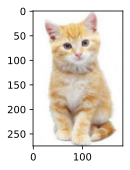

In [48]:
d2l.set_figsize()
img = plt.imread('../img/cat1.jpg')
plt.imshow(img)

### 1. 边界框

在目标检测中，我们通常使用边界框（bounding box）来描述对象的空间位置。 边界框是矩形的，由矩形左上角的以及右下角的X和y坐标决定。 另一种常用的边界框表示方法是边界框中心的(x,y)轴坐标以及框的宽度和高度。

In [49]:
def box_corner_to_center(boxes):
    """从（左上，右下）转换到（中间，宽度，高度）"""
    x1, y1, x2, y2 = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    cx = (x1 + x2) / 2
    cy = (y1 + y2) / 2
    w = x2 - x1
    h = y2 - y1
    boxes = torch.stack((cx, cy, w, h), dim=1)
    return boxes

def box_center_to_corner(boxes):
    """从（中间，宽度，高度）转换到（左上，右下）"""
    cx, cy, w, h = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    x1 = cx - 0.5 * w
    y1 = cy - 0.5 * h
    x2 = cx + 0.5 * w
    y2 = cy + 0.5 * h
    boxes = torch.stack((x1, y1, x2, y2), dim=-1)
    return boxes

In [58]:
# bbox是边界框的英文缩写
cat_bbox = [20, 20, 160, 270]

In [62]:
boxes = torch.tensor([cat_bbox])
box_center_to_corner(box_corner_to_center(boxes)) == boxes

tensor([[True, True, True, True]])

In [63]:
def bbox_to_rect(bbox, color):
    # 将边界框(左上x,左上y,右下x,右下y)格式转换成matplotlib格式：
    # ((左上x,左上y),宽,高)
    return plt.Rectangle(xy=(bbox[0], bbox[1]), width=bbox[2]-bbox[0], height=bbox[3]-bbox[1],
        fill=False, edgecolor=color, linewidth=2)

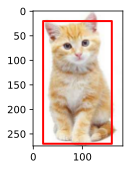

In [64]:
fig = plt.imshow(img)
fig.axes.add_patch(bbox_to_rect(cat_bbox, 'RED'))